# Topic Modeling with BERTopic 
Part of BA Thesis by Enis Settouf

BERTopic:
Topic modeling technique that leverages transformers and a custom class-based TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions. 

<br>

[Source:](https://github.com/kapadias/mediumposts/blob/master/natural_language_processing/topic_modeling/notebooks/Introduction%20to%20Topic%20Modeling.ipynb) Basic Tutorial used for this notebook, by Shashank Kapadia

# 1. Prepare Runtime

Install libraries:

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 6.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9b165bbd8dad3f64b3ec2a7ff95dd21c41fb71748a66392894c32781066fea05
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=04b4fd2bbc98c515399061680ab54e3fe6d387f47e253ee320d186065c61cbf7
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


Mounting to Google Drive for access to the files:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Creating topics for all Documents at once
<br>
Examplery Documents have been explored beforehand using the the word clouds and resulting topics

In [ ]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from pprint import pprint
import gensim.corpora as corpora

df_results = pd.DataFrame(columns=["doc_id", "topic_words"])

# Set Documents for topic creation
doc_ids = [491,814,612,658,585,603,487,1375,1120,1081]
# Load data file
df = pd.read_csv('/content/drive/MyDrive/ba-thesis/topic-modeling/results/documents/only_docs/documents_full.csv', sep=';', encoding='utf-8', engine = 'python')

for doc_id in doc_ids:
    
    df_legal_docs = df[df["doc_id"]==doc_id]

    # Remove punctuation
    df_legal_docs['doc_text_processed'] = \
    df_legal_docs['doc_text'].map(lambda x: re.sub('[,\;_|().!?#§*]', '', x))

    # Convert the titles to lowercase
    df_legal_docs['doc_text_processed'] = \
    df_legal_docs['doc_text_processed'].map(lambda x: x.lower())

    # Print out the first rows of papers
    df_legal_docs['doc_text_processed'].head()
    df_legal_docs.head()

    stop_words = stopwords.words('german')
    stop_words.extend(["hinsichtlich", "satz","gemaß","herrn","angeklagte","angeklagten","sinne","darauf","klagerin","klager","beklagten","beklagte","worden","hohe","art","bereits","neu","ab","beschluss","rn","art","bereits","kosten","klage","entscheidung","beschluss","antragsstellerin","verfahren","voraussetzungen",'fur', 'abs', 'nr', 'sei', 'bzw', 'sowie', 'bzw', 'seien', 'soweit', 'uber', 'wurde', 'mehr', 'insoweit', 'wurden', 'insbesondere', 'vielmehr', 'daher', 'konnen', 'ubrigen', 'schon', 'jedoch', 'sowohl', 'vgl', 'dabei', 'aufgrund', 'danach', 'etwa', 'wegen', 'übrigen', 'lediglich'])

    def sent_to_words(sentences):
        for sentence in sentences:
            # deacc=True removes punctuations
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) 
                if word not in stop_words] for doc in texts]

    data = df_legal_docs.doc_text_processed.values.tolist()
    data_words = list(sent_to_words(data))

    # remove stop words
    data_words = remove_stopwords(data_words)


    # Create Dictionary
    id2word = corpora.Dictionary(data_words)

    # Create Corpus
    texts = data_words

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    # number of topics
    num_topics = 3

    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)

    # Print the Keyword in the 10 topics
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]

    # Add top 3 topics to one string
    for i in range(3):
        topic = lda_model.show_topics()[i][1]
        topic_words_list = re.findall(r'"([^"]*)"', topic)
        topic_words = ', '.join(topic_words_list[:3])
        df_results.loc[len(df_results.index)] = [doc_id, topic_words]
        
print(df_results.head())
df_results.to_csv(path_or_buf="/content/drive/MyDrive/ba-thesis/topic-modeling/results/documents/documents_topics_lda.csv", index=False, sep=';', encoding='utf-8')

<>:24: DeprecationWarning: invalid escape sequence \;
<>:24: DeprecationWarning: invalid escape sequence \;
<>:24: DeprecationWarning: invalid escape sequence \;
<ipython-input-90-8b7c340ceefd>:24: DeprecationWarning: invalid escape sequence \;
  df_legal_docs['doc_text'].map(lambda x: re.sub('[,\;_|().!?#§*]', '', x))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

['renten', 'geleistet', 'alters', 'verminderter', 'todes', 'renten', 'alters', 'altersrente', 'langjahrig', 'versicherte', 'altersrente', 'menschen', 'altersrente', 'besonders', 'langjahrig', 'versicherte', 'altersrente', 'langjahrig', 'tage', 'beschaftigte', 'bergleute', 'vorschriften', 'funften', 'kapitels', 'altersrente', 'altersrente', 'frauen', 'renten', 'verminderter', 'rente']
[(0, 2), (1, 6), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 3), (16, 1), (17, 4), (18, 5), (19, 1), (20, 2), (21, 2), (22, 2), (23, 2), (24, 1), (25, 2), (26, 1), (27, 3), (28, 3)]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


[(0,
  '0.098*"altersrente" + 0.073*"renten" + 0.055*"rente" + 0.053*"witwenrente" '
  '+ 0.050*"langjahrig" + 0.049*"witwerrente" + 0.040*"funften" + '
  '0.039*"teilweiser" + 0.038*"versicherte" + 0.037*"vorschriften"'),
 (1,
  '0.051*"renten" + 0.049*"altersrente" + 0.047*"rente" + 0.040*"verminderter" '
  '+ 0.040*"witwerrente" + 0.039*"langjahrig" + 0.037*"kapitels" + '
  '0.036*"alters" + 0.036*"funften" + 0.035*"todes"'),
 (2,
  '0.077*"renten" + 0.075*"altersrente" + 0.069*"rente" + 0.048*"witwerrente" '
  '+ 0.047*"langjahrig" + 0.045*"witwenrente" + 0.038*"alters" + '
  '0.036*"kapitels" + 0.036*"verminderter" + 0.035*"bergleute"')]
['vereinbarung', 'steuerberater', 'hohere', 'gesetzliche', 'vergutung', 'fordern', 'erklarung', 'auftraggebers', 'textform', 'abgegeben', 'schriftstuck', 'auftraggeber', 'verfasst', 'schriftstuck', 'vergleichbarer', 'weise', 'bezeichnet', 'schriftstuck', 'vereinbarungen', 'ausnahme', 'deutlich', 'abgesetzt', 'darf', 'vollmacht', 'enthalten', 'umfa

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


[(0,
  '0.044*"vergutung" + 0.037*"gesetzliche" + 0.035*"schriftstuck" + '
  '0.032*"textform" + 0.031*"auftraggeber" + 0.026*"steuerberater" + '
  '0.025*"vereinbart" + 0.023*"niedrigere" + 0.023*"erklarung" + '
  '0.023*"angemessenen"'),
 (1,
  '0.056*"vergutung" + 0.034*"auftraggeber" + 0.032*"textform" + '
  '0.030*"schriftstuck" + 0.028*"gesetzliche" + 0.028*"hohere" + '
  '0.024*"niedrigere" + 0.024*"angemessenen" + 0.023*"erklarung" + '
  '0.023*"vereinbart"'),
 (2,
  '0.032*"vergutung" + 0.026*"textform" + 0.025*"schriftstuck" + '
  '0.024*"gesetzliche" + 0.024*"auftraggeber" + 0.022*"erklarung" + '
  '0.022*"steuerberater" + 0.021*"angemessenen" + 0.020*"niedrigere" + '
  '0.019*"hohere"')]


['politisch', 'verfolgte', 'genießen', 'asylrecht', 'absatz', 'berufen', 'wer', 'mitgliedstaat', 'europaischen', 'gemeinschaften', 'drittstaat', 'einreist', 'anwendung', 'abkommens', 'rechtsstellung', 'fluchtlinge', 'konvention', 'schutze', 'menschenrechte', 'grundfreiheiten', 'sichergestellt', 'staaten', 'außerhalb', 'europaischen', 'gemeinschaften', 'satzes', 'zutreffen', 'gesetz', 'zustimmung', 'bundesrates']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]
[(0,
  '0.019*"staaten" + 0.018*"gemeinschaften" + 0.018*"gesetz" + 0.017*"fallen" '
  '+ 0.014*"grundfreiheiten" + 0.014*"europaischen" + 0.013*"satzes" + '
  '0.013*"politisch" + 0.013*"schutze" + 0.013*"bundesrates"'),
 (1,
  '0.019*"europaischen" + 0.017*"staaten" + 0.016*"gesetz" + 0.015*"fallen" + '
  '0.015*"gemein

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


['tatbestand', 'geklart', 'gehort', 'angaben', 'volk', 'palastinenser', 'lebt', 'seit', 'bundesrepublik', 'deutschland', 'bundesrepublik', 'besitz', 'mehrfach', 'verlangert', 'mai', 'erwerbstatig', 'juli', 'beantragte', 'kindergeld', 'vier', 'kinder', 'familienkasse', 'lehnte', 'antrag', 'einspruch', 'erfolg', 'anschließenden', 'klageverfahren', 'erklarte', 'klagers']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]
[(0,
  '0.014*"fgo" + 0.012*"bfh" + 0.011*"mai" + 0.011*"bundesrepublik" + '
  '0.010*"rz" + 0.010*"klagers" + 0.009*"revision" + 0.009*"nv" + '
  '0.009*"familienkasse" + 0.008*"juli"'),
 (1,
  '0.023*"mai" + 0.018*"fgo" + 0.017*"bfh" + 0.015*"klagers" + 0.014*"rz" + '
  '0.013*"bundesrepublik" + 0.012*"familienkasse" + 0.012*"kindergeld" + '
  '0.012*"nv" + 0.011*

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


['tenor', 'sofortige', 'beschwerde', 'kindesmutter', 'weiteren', 'beteiligten', 'amtsgerichts', 'familiengericht', 'halle', 'saale', 'az', 'aufgehoben', 'sache', 'erneuten', 'behandlung', 'amtsgericht', 'familiengericht', 'halle', 'saale', 'zuruckverwiesen', 'ergeht', 'auslagen', 'erstattet', 'grunde', 'selbstandige', 'eingeleitet', 'finden', 'vorschriften', 'famfg', 'anwendung']
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 6), (8, 3), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]
[(0,
  '0.054*"zpo" + 0.036*"famfg" + 0.029*"kindesmutter" + 0.026*"amtsgericht" + '
  '0.019*"olg" + 0.018*"famrz" + 0.013*"amtsgerichts" + 0.012*"wirksam" + '
  '0.012*"verhaltnisse" + 0.011*"halle"'),
 (1,
  '0.038*"famfg" + 0.038*"zpo" + 0.027*"kindesmutter" + 0.024*"amtsgericht" + '
  '0.017*"famrz" + 0.016*"frist" + 0.016*"verhaltnisse" + 0.016*"ol

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


['tatbestand', 'streitig', 'zeitraum', 'januar', 'juli', 'erhielt', 'juli', 'geborene', 'tochter', 'kindergeld', 'studierte', 'universitat', 'erzielte', 'tatigkeit', 'streitigen', 'zeitraum', 'einkunfte', 'arbeit', 'daneben', 'erhielt', 'leistungen', 'bafog', 'nachdem', 'juli', 'lebensjahr', 'vollendet', 'gelangte', 'familienkasse', 'rahmen', 'uberprufung']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 5), (13, 1), (14, 2), (15, 1), (16, 4), (17, 1), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 2), (27, 1), (28, 1), (29, 1)]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


[(0,
  '0.037*"estg" + 0.036*"einkunfte" + 0.028*"bezuge" + 0.020*"familienkasse" + '
  '0.015*"fg" + 0.013*"juli" + 0.010*"anteiligen" + 0.010*"auffassung" + '
  '0.009*"teil" + 0.009*"vollendet"'),
 (1,
  '0.042*"estg" + 0.025*"bezuge" + 0.021*"einkunfte" + 0.017*"juli" + '
  '0.015*"familienkasse" + 0.014*"fg" + 0.012*"anteiligen" + '
  '0.011*"auffassung" + 0.010*"maßgeblichen" + 0.009*"lebensjahr"'),
 (2,
  '0.052*"estg" + 0.028*"einkunfte" + 0.027*"bezuge" + 0.016*"familienkasse" + '
  '0.015*"juli" + 0.013*"anteiligen" + 0.011*"fg" + 0.010*"maßgeblichen" + '
  '0.009*"ausdrucklich" + 0.008*"revision"')]
['betriebsrats', 'niedersachsen', 'november', 'tabv', 'zuruckgewiesen', 'grunde', 'beteiligten', 'streiten', 'verpflichtung', 'arbeitgeberin', 'vorlage', 'arbeitgeberin', 'unternehmen', 'betreibt', 'psychiatrische', 'fachkliniken', 'ca', 'arbeitnehmern', 'antragsteller', 'beide', 'kliniken', 'gewahlte', 'betriebsrat', 'besteht', 'arbeitgeberin', 'erstellt', 'verordnung', 'maßstab

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


[(0,
  '0.030*"betriebsrat" + 0.022*"personalplanung" + 0.018*"arbeitgeberin" + '
  '0.013*"betrvg" + 0.013*"betriebsrats" + 0.011*"bag" + 0.011*"abr" + '
  '0.010*"arbeitgeber" + 0.009*"ii" + 0.008*"unterlagen"'),
 (1,
  '0.030*"betriebsrat" + 0.020*"personalplanung" + 0.017*"arbeitgeberin" + '
  '0.013*"betrvg" + 0.012*"arbeitgeber" + 0.012*"betriebsrats" + 0.011*"bag" + '
  '0.009*"verfugung" + 0.009*"unterlagen" + 0.009*"anhand"'),
 (2,
  '0.023*"betriebsrat" + 0.023*"personalplanung" + 0.013*"arbeitgeberin" + '
  '0.012*"betriebsrats" + 0.012*"bag" + 0.011*"abr" + 0.011*"betrvg" + '
  '0.010*"anhand" + 0.010*"unterlagen" + 0.009*"arbeitgeber"')]
['tatbestand', 'geborene', 'antragsteller', 'soldat', 'zeit', 'dienstzeit', 'jahren', 'zuletzt', 'zwei', 'jahre', 'sieben', 'monate', 'endend', 'festgesetzt', 'bescheid', 'bundesamts', 'bundeswehr', 'januar', 'antragsteller', 'ablauf', 'februar', 'sg', 'mangelnder', 'eignung', 'entlassen', 'antragsteller', 'beantragte', 'schreiben', 'augus

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


[(0,
  '0.032*"antragsteller" + 0.017*"februar" + 0.016*"vwgo" + 0.014*"wbo" + '
  '0.014*"juni" + 0.013*"juli" + 0.012*"wb" + 0.012*"gerichtliche" + '
  '0.012*"verfahrens" + 0.010*"antrag"'),
 (1,
  '0.025*"antragsteller" + 0.015*"vwgo" + 0.013*"wb" + 0.013*"gerichtliche" + '
  '0.013*"verfahrens" + 0.013*"wbo" + 0.013*"februar" + 0.012*"juli" + '
  '0.011*"senat" + 0.009*"antrag"'),
 (2,
  '0.013*"antragsteller" + 0.009*"juni" + 0.008*"verfahrens" + '
  '0.008*"gerichtliche" + 0.008*"wbo" + 0.007*"wb" + 0.006*"februar" + '
  '0.006*"senat" + 0.006*"verteidigung" + 0.006*"antragstellers"')]
['grunde', 'wenden', 'baugenehmigung', 'platz', 'abstellen', 'omnibussen', 'dienen', 'stellplatze', 'sechs', 'fahrzeugen', 'wahrend', 'schulzeit', 'zehn', 'fahrzeugen', 'ferien', 'abfahrtszeiten', 'schultagen', 'jeweils', 'uhr', 'abfahrten', 'ca', 'uhr', 'ruckkehr', 'uhr', 'abfahrten', 'uhr', 'ruckkehr', 'uhr', 'abfahrten', 'uhr']
[(0, 4), (1, 4), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


[(0,
  '0.018*"larm" + 0.014*"ta" + 0.012*"bverwg" + 0.012*"vwgo" + '
  '0.011*"beschwerde" + 0.007*"august" + 0.007*"urteil" + 0.005*"anlage" + '
  '0.005*"rechtssatz" + 0.005*"bedeutung"'),
 (1,
  '0.016*"ta" + 0.015*"vwgo" + 0.014*"larm" + 0.009*"beschwerde" + '
  '0.009*"bverwg" + 0.008*"august" + 0.007*"buchholz" + 0.006*"anlage" + '
  '0.006*"urteil" + 0.006*"uhr"'),
 (2,
  '0.012*"vwgo" + 0.012*"larm" + 0.012*"ta" + 0.009*"bverwg" + '
  '0.008*"beschwerde" + 0.006*"uhr" + 0.006*"urteil" + 0.006*"august" + '
  '0.005*"buchholz" + 0.005*"anlage"')]


['berufung', 'zuruckgewiesen', 'fallen', 'last', 'urteil', 'vorlaufig', 'vollstreckbar', 'revision', 'zugelassen', 'tatbestand', 'stadt', 'geboren', 'besuchte', 'dortige', 'grundschule', 'sodann', 'hauptschule', 'realschule', 'stadt', 'absolvierte', 'kaufmannischen', 'berufsschule', 'neunkirchen', 'besuch', 'handelsschule', 'neunkirchen', 'folgte', 'mittlere', 'reife', 'erwarb']
[(0, 1), (1, 4), (2, 2), (3, 12), (4, 3), (5, 1), (6, 4), (7, 2), (8, 1), (9, 3), (10, 2), (11, 2), (12, 2), (13, 1), (14, 7), (15, 4), (16, 2), (17, 5), (18, 4), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 2), (27, 2), (28, 2), (29, 1)]
[(0,
  '0.009*"hells" + 0.008*"nebentatigkeit" + 0.007*"angels" + '
  '0.007*"dienstherrn" + 0.006*"beamten" + 0.006*"bbg" + 0.005*"stunden" + '
  '0.004*"urteil" + 0.004*"vertrauen" + 0.004*"frage"'),
 (1,
  '0.008*"hells" + 0.007*"dienstherrn" + 0.007*"nebentatigkeit" + '
  '0.006*"angels" + 0.006*"bbg" + 0.006*"beamten" + 0.005*"urteil" + '
  '0.005*"

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


# 3. Exploration beforehand
<br> 
This was done before creating topics for all test documents

Word Cloud for Words in a Document after stopword removal:

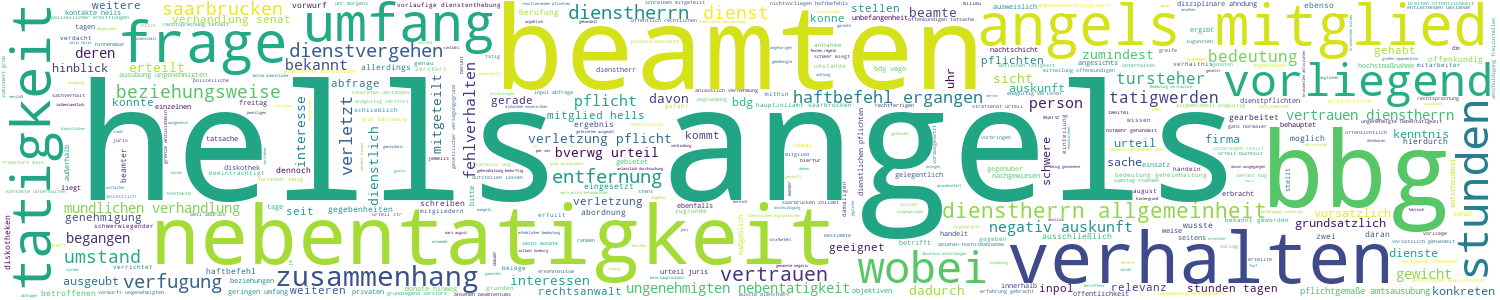

In [ ]:
# flatten list of lists
temp_data_words = [item for sublist in data_words for item in sublist]

# Join the different processed titles together.
long_string = ','.join(temp_data_words)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white",  max_words=5000, width=1500, height=300, contour_width=10, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud  
wordcloud.to_image()

Visualization of the topic of one document:

In [ ]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/ba-thesis/topic-modeling/results/ldavis_topics_' + str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/ba-thesis/topic-modeling/results/ldavis_topics_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.006382  0.000812       1        1  99.884604
8     -0.003045 -0.001500       2        1   0.012823
0     -0.002720 -0.000325       3        1   0.012823
3     -0.000239  0.001205       4        1   0.012822
6      0.000023 -0.000071       5        1   0.012822
2      0.000322  0.000504       6        1   0.012822
4      0.000830 -0.001152       7        1   0.012821
1      0.002557 -0.000232       8        1   0.012821
7      0.002726  0.000964       9        1   0.012821
5      0.005929 -0.000205      10        1   0.012821, topic_info=           Term       Freq      Total Category  logprob  loglift
402          ta  16.000000  16.000000  Default  30.0000  30.0000
299        larm  15.000000  15.000000  Default  29.0000  29.0000
453        vwgo  13.000000  13.000000  Default  28.0000  28.0000
118      bverwg  10.000000  10.000000  Default  27.0000  27.0000
92   beschwerde   8.000000   8.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
314        marz   0.000297   3.476207  Topic10  -5.8188  -0.4067
315     maximal   0.000284   2.818355  Topic10  -5.8634  -0.2416
182    feldhaus   0.000287   2.999538  Topic10  -5.8532  -0.2937
0           aao   0.000297   3.858444  Topic10  -5.8167  -0.5089
349  rechtssatz   0.000297   3.956859  Topic10  -5.8194  -0.5369

[697 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         1  1.036687              aao
1         1  0.959397        abfahrten
5         1  0.993151          abgasen
14        1  1.086515       allerdings
15        1  0.848728        allgemein
...     ...       ...              ...
474       1  1.040738             zehn
477       1  1.176847             zfbr
484       1  1.155583         zumutbar
486       1  1.123741           zuruck
487       1  1.044666  zuruckzugreifen

[195 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 1, 4, 7, 3, 5, 2, 8, 6])